# Capstone Project — The Battle of Neighbourhoods

#### By - Shubhranshi Kapoor , 19 Aug 2020

## Introduction

Pune, also known as Poona, is a bustling metropolis in the Indian State of Maharashtra and the eighth most populous city in India, with an estimated population of 7.4 million as of 2020.It has been ranked as "the most livable city in India" several times.Pune is widely regarded as the second major "IT hub of India" and the top "automobile and manufacturing hub of India". It is also known as the "Oxford of the East" due to the presence of several well-known educational institutions. The city has emerged as a major educational hub in recent decades, with nearly half of the total international students in the country studying in Pune. Research institutes of information technology, education, management and training attract students and professionals from India and overseas.

With it’s diverse culture , comes diverse food items. There are many restaurants in Pune City, each belonging to different categories like Chinese, Italian, French etc. apart from wide variety of Indian cuisines. So as part of this project , we will list and visualise all major parts of Pune City .

#### Questions that can be asked using the above mentioned datasets

- What is best location in Pune City for Italian Cuisine ?
- Which areas have large number of Italian Resturant ?
- Which all areas have less number of resturant ?
- Which is the best place to stay if I prefer Italian Cuisine ?
- What places are have best restaurant in Pune?

## Data

For this project we need the following data :

1. Pune Resturants data that contains list Locality, Resturant name,Rating along with their latitude and longitude.

- Data source : Zomato kaggel dataset : "https://www.kaggle.com/shrutimehta/zomato-restaurants-data"
- Description : This data set contains the required information. And we will use this data set to explore various locality of Pune city.

2. Nearby places in each locality of Pune city.

- Data source : Fousquare API : "https://developer.foursquare.com/"
- Description : By using this api we will get all the venues in each neighborhood.

## Approach

1. Collect the Pune city data from Zomato kaggel dataset.
2. Using FourSquare API we will find all venues for each neighborhood.
3. Filter out all venues that are nearby by locality.
4. Using aggregative rating for each resturant to find the best places.
5. Visualize the Ranking of neighborhoods using folium library(python).

## Importing Libraries

In [1]:
import random # library for random number generation
import numpy as np # library for vectorized computation
import pandas as pd # library to process data as dataframes

import requests # library to handle requests
from pandas.io.json import json_normalize # tranform JSON file into a pandas dataframe

# Matplotlib and associated plotting modules
import matplotlib.cm as cm
import matplotlib.colors as colors

import matplotlib.pyplot as plt # plotting library
# backend for rendering plots within the browser
%matplotlib inline 

from sklearn.cluster import KMeans 
from sklearn.datasets.samples_generator import make_blobs

!conda install -c conda-forge folium=0.5.0 --yes # uncomment this line if you haven't completed the Foursquare API lab
import folium # map rendering library
! pip install geocoder
import geocoder

print('Libraries imported.')

Solving environment: done


==> WARNING: A newer version of conda exists. <==
  current version: 4.8.3
  latest version: 4.8.4

Please update conda by running

    $ conda update -n base -c defaults conda



# All requested packages already installed.

Libraries imported.


## Read the zomato resturant data from csv file

In [39]:
df_data = pd.read_csv('indian_restaurants_details_ready.csv', encoding='ISO-8859-1')
df_data.head()

zomato_url  \
0  https://www.zomato.com/ncr/sainik-food-pandav-...   
1  https://www.zomato.com/mumbai/kunals-creamery-...   
2  https://www.zomato.com/ncr/brij-palace-restaur...   
3  https://www.zomato.com/ncr/sahib-hotel-paharga...   
4  https://www.zomato.com/kolkata/chunkys-shibpur...   

                        name       city          area  rating  rating_count  \
0                Sainik Food  Delhi NCR  Pandav Nagar     3.2          21.0   
1  Kunal's Creamery & Eatery     Mumbai     Ambernath     3.6          51.0   
2     Brij Palace Restaurant  Delhi NCR        Jasola     NaN           NaN   
3                Sahib Hotel  Delhi NCR     Paharganj     NaN           NaN   
4                   Chunky's    Kolkata       Shibpur     3.0          78.0   

                       telephone                           cusine  \
0    011 22486474 +91 9717806814                     North Indian   
1  +91 9561356690 +91 9637537499  Street Food, Chinese, Fast Food   
2                 +91 9891828106                     North Indian   
3                 +91 9670005455                     North Indian   
4                 +91 8442828284      Italian, Pizza, Continental   

   cost_for_two                                            address  \
0         300.0  C 4/1, Opposite Mother Dairy, Pandav Nagar, Ne...   
1         500.0  Shop 14, Trishul Shivdham Complex, Shiv Mandir...   
2         250.0  4, Okhla Bus Stand, Jamia Nagar, Near, Jasola,...   
3         300.0  121, Amrit Kaur Market, Opposite New Delhi Rai...   
4         500.0            523, G.T Road, Howrah., Shibpur, Howrah   

                                             timings  online_order  \
0  {'Mon': [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0...         False   
1  {'Mon': [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1...         False   
2  {'Mon': [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1...         False   
3  {'Mon': [1, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1...         False   
4  {'Mon': [1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1...          True   

   table_reservation  delivery_only  \
0              False          False   
1              False          False   
2              False          False   
3              False          False   
4              False          False   

                                         famous_food  longitude   latitude  
0                                                NaN  77.284871  28.617732  
1                                        Penne Pasta  73.184287  19.205887  
2  Chana Masala , Butter Naan , Paneer Bhujia , D...  77.291223  28.563034  
3                                                NaN  77.218298  28.642411  
4                                                NaN  88.330708  22.577758

In [40]:
df_PUNE = df_data[df_data['city'] == 'Pune']
df_PUNE.reset_index(drop=True, inplace=True)
df_PUNE.head()

zomato_url  \
0  https://www.zomato.com/pune/indo-western-food-...   
1       https://www.zomato.com/pune/gangotree-akurdi   
2  https://www.zomato.com/pune/shri-krishna-pure-...   
3  https://www.zomato.com/pune/expresso-royle-akurdi   
4    https://www.zomato.com/pune/cafe-hashtag-akurdi   

                               name  city    area  rating  rating_count  \
0         Indo Western Food Station  Pune  Akurdi     3.5          20.0   
1                         Gangotree  Pune  Akurdi     3.9         141.0   
2  Shri Krishna Pure Veg Restaurant  Pune  Akurdi     3.4          55.0   
3                    Expresso Royle  Pune  Akurdi     3.7          90.0   
4                      Cafe Hashtag  Pune  Akurdi     2.5          51.0   

                       telephone                                   cusine  \
0                 +91 7020558356                            Cafe, Chinese   
1    020 27640469 +91 9096554201  South Indian, North Indian, Street Food   
2  +91 7517529996 +91 7517529997                    North Indian, Chinese   
3                 +91 7057298444                          Fast Food, Cafe   
4  +91 9139604964 +91 7276708123                                     Cafe   

   cost_for_two                                            address  \
0         300.0  Shop 4, Krishna Kriti Apartment, Sector 26, PC...   
1         300.0  9, ABC Tiara, Near Akurdi Railway Station, Sta...   
2         700.0  Tapasvi Plaza, Khandoba Chowk, Near Godavari S...   
3         700.0  Gurudwara Chowk, Near Akurdi Railway Station, ...   
4         300.0  Shop 8, Opposite Akurdi Police Chowky, Sector ...   

                                             timings  online_order  \
0  {'Mon': [0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1...          True   
1  {'Mon': [0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1...         False   
2  {'Mon': [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1...         False   
3  {'Mon': [1, 1, 1, 0, 0, 0, 0, 0, 0, 0.75, 1, 1...          True   
4  {'Mon': [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1...         False   

   table_reservation  delivery_only  \
0              False          False   
1              False          False   
2              False          False   
3               True          False   
4              False          False   

                                        famous_food  longitude   latitude  
0                                               NaN  73.856740  18.520430  
1                                 Pav Bhaji , Thali  73.765289  18.648924  
2                                               NaN  73.786292  18.649855  
3   Pizza , Burgers , Sandwich , Hot Coffee , Fries  73.766440  18.645427  
4  Coffee , Sandwich , Burgers , Fries , Cappuccino  73.767460  18.650769

## Data Cleaning

#### Remove the unwanted columns and rows from dataset

In [41]:
#df_Res= df_PUNE[df_PUNE.Longitude !=0.000000][['Restaurant Name','Locality','Longitude','Latitude','Cuisines','Aggregate rating','Rating text','Votes']]
df_PUNE = df_PUNE.dropna()
df_PUNE = df_PUNE.reset_index(drop=True)

df_Res= df_PUNE[df_PUNE.longitude !=0.000000]
df_Res= df_PUNE[df_PUNE.latitude !=0.000000]
df_Res = df_Res[df_Res.rating !=0.00]
df_Res= df_Res[['name','area','longitude','latitude','cusine','rating','rating_count']]
df_Res.rename(columns={'name': 'Restaurant Name', 'area': 'Locality', 'longitude': 'Longitude', 'latitude': 'Latitude', 'cusine': 'Cuisines', 'rating': 'Aggregate rating', 'rating_count': 'Votes'}, inplace=True)

df_Res.head()

Restaurant Name Locality  Longitude   Latitude  \
0                  Gangotree   Akurdi  73.765289  18.648924   
1             Expresso Royle   Akurdi  73.766440  18.645427   
2               Cafe Hashtag   Akurdi  73.767460  18.650769   
3  Sangeeta Restaurant & Bar   Akurdi  73.783322  18.650569   
4                  Naivedyam   Akurdi  73.786870  18.649210   

                                  Cuisines  Aggregate rating  Votes  
0  South Indian, North Indian, Street Food               3.9  141.0  
1                          Fast Food, Cafe               3.7   90.0  
2                                     Cafe               2.5   51.0  
3                    Chinese, North Indian               3.7   90.0  
4                            Maharashtrian               3.7  105.0

#### Created map to show the restaurant clusters

In [42]:
Pune_Rest = folium.Map(location=[18.57, 73.85], zoom_start=12)

X = df_Res['Latitude']
Y = df_Res['Longitude']
Z = np.stack((X, Y), axis=1)

kmeans = KMeans(n_clusters=5, random_state=0).fit(Z)

clusters = kmeans.labels_
colors = ['red', 'green', 'blue', 'yellow','orange']
df_Res ['Cluster'] = clusters

for latitude, longitude, Locality, cluster in zip(df_Res['Latitude'], df_Res['Longitude'], df_Res['Locality'], df_Res['Cluster']):
    label = folium.Popup(Locality, parse_html=True)
    folium.CircleMarker(
        [latitude, longitude],
        radius=5,
        popup=label,
        color='black',
        fill=True,
        fill_color=colors[cluster],
        fill_opacity=0.7).add_to(Pune_Rest)  

Pune_Rest

In [43]:
df_Res.head()

Restaurant Name Locality  Longitude   Latitude  \
0                  Gangotree   Akurdi  73.765289  18.648924   
1             Expresso Royle   Akurdi  73.766440  18.645427   
2               Cafe Hashtag   Akurdi  73.767460  18.650769   
3  Sangeeta Restaurant & Bar   Akurdi  73.783322  18.650569   
4                  Naivedyam   Akurdi  73.786870  18.649210   

                                  Cuisines  Aggregate rating  Votes  Cluster  
0  South Indian, North Indian, Street Food               3.9  141.0        2  
1                          Fast Food, Cafe               3.7   90.0        2  
2                                     Cafe               2.5   51.0        2  
3                    Chinese, North Indian               3.7   90.0        2  
4                            Maharashtrian               3.7  105.0        2

## Which places have best restaurant in Pune?

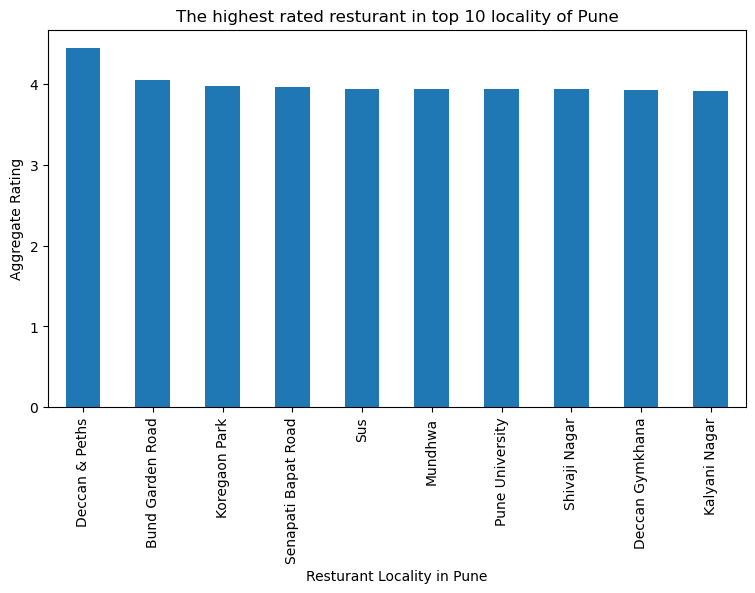

In [44]:
import matplotlib.pyplot as plt
plt.figure(figsize=(9,5), dpi = 100)
# title
plt.title('The highest rated resturant in top 10 locality of Pune')
#On x-axis

#giving a bar plot
df_Res.groupby('Locality')['Aggregate rating'].mean().nlargest(10).plot(kind='bar')

plt.xlabel('Resturant Locality in Pune')
#On y-axis
plt.ylabel('Aggregate Rating')
#displays the plot
plt.show()

The best restarants are available in **Deccan & Peths**

## Which places have worst restaurants in Pune?

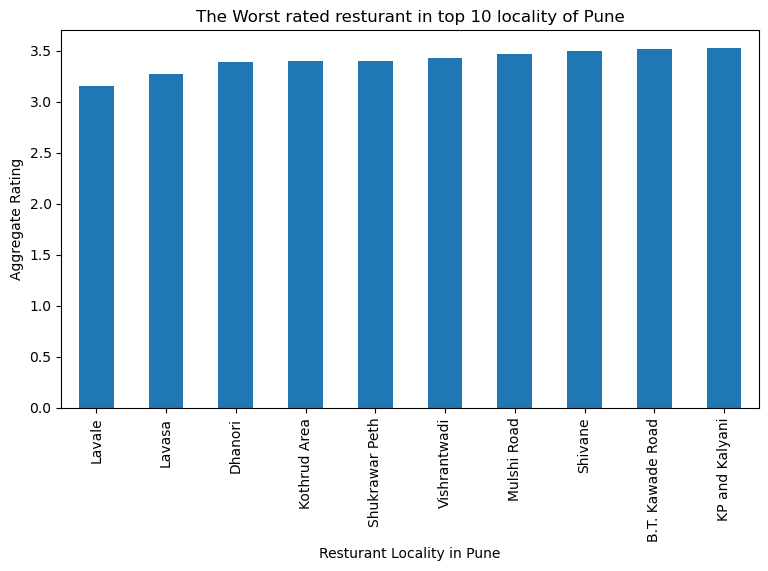

In [45]:
import matplotlib.pyplot as plt
plt.figure(figsize=(9,5), dpi = 100)
# title
plt.title('The Worst rated resturant in top 10 locality of Pune')
#On x-axis

#giving a bar plot

df_Res.groupby('Locality')['Aggregate rating'].mean().nsmallest(10).plot(kind='bar')

plt.xlabel('Resturant Locality in Pune')
#On y-axis
plt.ylabel('Aggregate Rating')

#displays the plot
plt.show()

The worst restarants are in **Lavale**

## Which place has highest number of restuarants in Pune city?

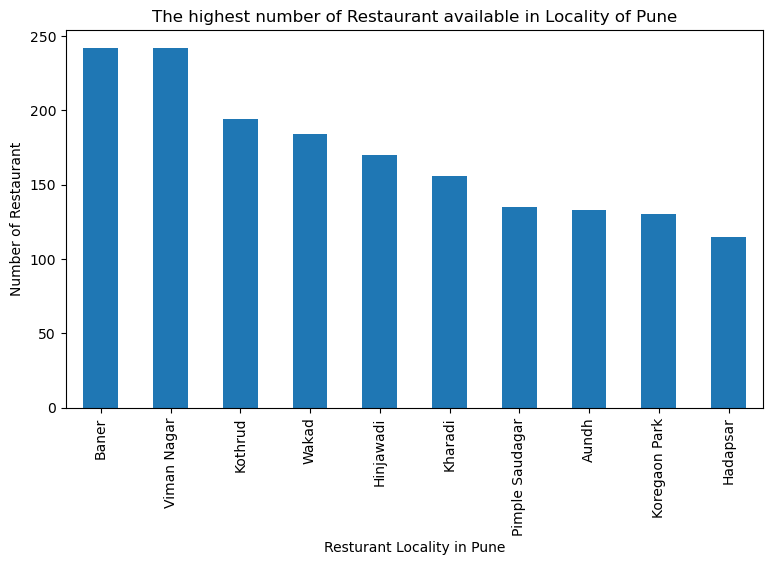

In [46]:
import matplotlib.pyplot as plt
plt.figure(figsize=(9,5), dpi = 100)
# title
plt.title('The highest number of Restaurant available in Locality of Pune')
#On x-axis

#giving a bar plot
df_Res.groupby('Locality')['Restaurant Name'].count().nlargest(10).plot(kind='bar')

plt.xlabel('Resturant Locality in Pune')
#On y-axis
plt.ylabel('Number of Restaurant')

#displays the plot
plt.show()

**Baner and Viman Nagar** has highest number of restuarants in Pune City

## Which place has lowest number of restuarants in Pune city?

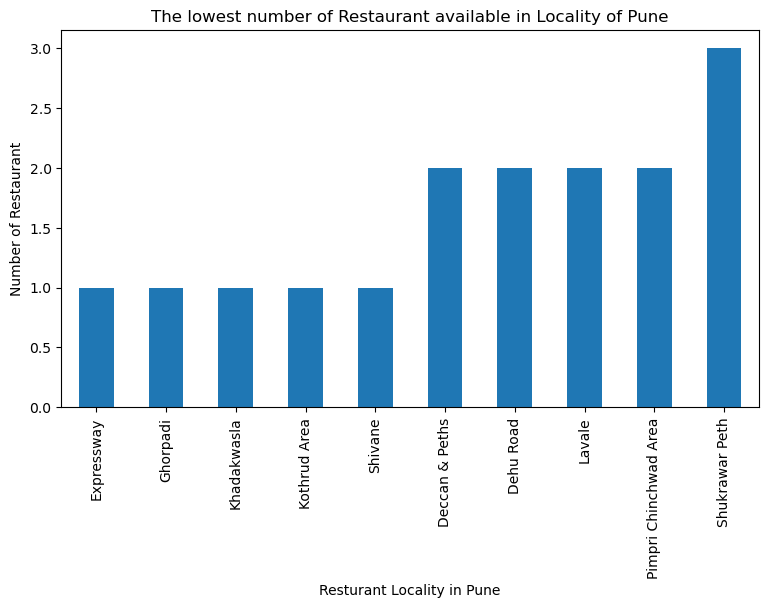

In [47]:
import matplotlib.pyplot as plt
plt.figure(figsize=(9,5), dpi = 100)
# title
plt.title('The lowest number of Restaurant available in Locality of Pune')
#On x-axis

#giving a bar plot
df_Res.groupby('Locality')['Restaurant Name'].count().nsmallest(10).plot(kind='bar')

plt.xlabel('Resturant Locality in Pune')
#On y-axis
plt.ylabel('Number of Restaurant')

#displays the plot
plt.show()

**Expresway, Khadakwasla , Kothrud Area** have lowest number of restaurants

## Which area has most number of Italian restaurant in Pune city

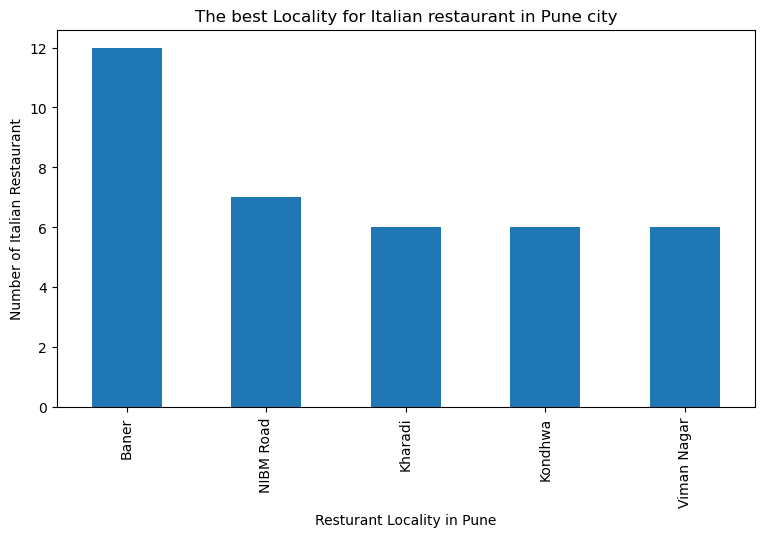

In [48]:
import matplotlib.pyplot as plt
plt.figure(figsize=(9,5), dpi = 100)
# title
plt.title('The best Locality for Italian restaurant in Pune city')
#On x-axis

#giving a bar plot
df_Res[df_Res['Cuisines'].str.startswith('Italian')].groupby('Locality')['Restaurant Name'].count().nlargest(5).plot(kind='bar')

plt.xlabel('Resturant Locality in Pune')
#On y-axis
plt.ylabel('Number of Italian Restaurant')

#displays the plot
plt.show()

**Baner**  is the best place for Italian restaurant.

## Which area has higgest rating of Italian resturants in Pune?

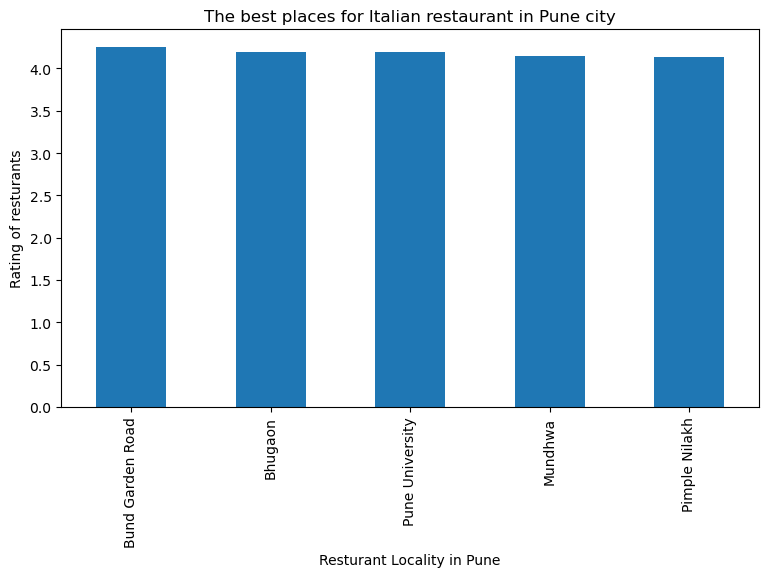

In [49]:
import matplotlib.pyplot as plt
plt.figure(figsize=(9,5), dpi = 100)
# title
plt.title('The best places for Italian restaurant in Pune city')
#On x-axis

#giving a bar plot
df_Res[df_Res['Cuisines'].str.startswith('Chinese')].groupby('Locality')['Aggregate rating'].mean().nlargest(5).plot(kind='bar')

plt.xlabel('Resturant Locality in Pune')
#On y-axis
plt.ylabel('Rating of resturants')

#displays the plot
plt.show()

**Bund Garden Road** has best Italian resturants.

## Data transformation

Based on Locality grouping the data

In [50]:
df_Res_Loc =  df_Res.groupby('Locality').count()['Restaurant Name'].to_frame()
df_Res_rating= df_Res.groupby('Locality')['Aggregate rating'].mean().to_frame()
d_Cuisines = df_Res.groupby(['Locality'])['Cuisines'].agg(', '.join).reset_index()
#d_R = df_Res.groupby(['Locality'])['Rating text'].unique().agg(', '.join).reset_index()
d_V = df_Res.groupby(['Locality'])['Votes'].sum().to_frame()
d_Lat = df_Res.groupby('Locality').mean()['Latitude'].to_frame()
d_Lng = df_Res.groupby('Locality').mean()['Longitude'].to_frame()
#df_final = pd.merge(d_Lat,d_Lng,on='Locality').merge(df_Res_Loc, on='Locality').merge(d_Cuisines, on='Locality').merge(df_Res_rating,on ='Locality').merge(d_R, on ='Locality').merge(d_V, on ='Locality')
df_final = pd.merge(d_Lat,d_Lng,on='Locality').merge(df_Res_Loc, on='Locality').merge(d_Cuisines, on='Locality').merge(df_Res_rating,on ='Locality').merge(d_V, on ='Locality')

In [51]:
df_final = df_final[df_final['Aggregate rating'] != 0.000000]
df_final.columns =['Locality','Lat','Lng', 'No_of_Restaurant','Cusines', 'Agg_Rating','No_of_Votes']
df_final.head()

Locality        Lat        Lng  No_of_Restaurant  \
0            Akurdi  18.650478  73.772272                23   
1             Aundh  18.560537  73.806087               133   
2  B.T. Kawade Road  18.525643  73.906212                 5   
3          Balewadi  18.575478  73.772069                36   
4             Baner  18.560805  73.785572               242   

                                             Cusines  Agg_Rating  No_of_Votes  
0  South Indian, North Indian, Street Food, Fast ...    3.704348       4310.0  
1  Korean, Japanese, Asian, North Indian, Mughlai...    3.721053      48882.0  
2  North Indian, Maharashtrian, Desserts, Chinese...    3.520000        374.0  
3  Chinese, North Indian, North Indian, Chinese, ...    3.644444       7997.0  
4  North Indian, Continental, Asian, Italian, Mah...    3.821074     121456.0

In [52]:
df_final.shape
#list(df_final['Locality'])

(86, 7)

## Define Foursquare Credentials and Version

In [53]:
## Define Foursquare Credentials and Version
CLIENT_ID = 'UMYFKYSQGJK3YWWYM32YU21QDH3H3JUVGGXDCEYQIIZWFU4N' # Foursquare ID
CLIENT_SECRET = '2X2VMWX24HOYPOW3SISXJWI3U4RYQ0P5IYMA2PLSJWECYSEB' # Foursquare Secret
VERSION = '20180605' # Foursquare API version

print('Your credentails:')
print('CLIENT_ID: ' + CLIENT_ID)
print('CLIENT_SECRET:' + CLIENT_SECRET)

Your credentails:
CLIENT_ID: UMYFKYSQGJK3YWWYM32YU21QDH3H3JUVGGXDCEYQIIZWFU4N
CLIENT_SECRET:2X2VMWX24HOYPOW3SISXJWI3U4RYQ0P5IYMA2PLSJWECYSEB


## Create a function and explore all the Locality in Pune

In [54]:
## create a function to repeat the same process to all the Locality in Pune

def getNearbyVenues(names, latitudes, longitudes, radius=500,LIMIT = 100):
    
    venues_list=[]
    for name, lat, lng in zip(names, latitudes, longitudes):
        print(name)
            
        # create the API request URL
        url = 'https://api.foursquare.com/v2/venues/explore?&client_id={}&client_secret={}&v={}&ll={},{}&radius={}&limit={}'.format(
            CLIENT_ID, 
            CLIENT_SECRET, 
            VERSION, 
            lat, 
            lng, 
            radius, 
            LIMIT)
            
        # make the GET request
        results = requests.get(url).json()["response"]['groups'][0]['items']
        
        # return only relevant information for each nearby venue
        venues_list.append([(
            name, 
            lat, 
            lng, 
            v['venue']['name'], 
            v['venue']['location']['lat'], 
            v['venue']['location']['lng'],  
            v['venue']['categories'][0]['name']) for v in results])

    nearby_venues = pd.DataFrame([item for venue_list in venues_list for item in venue_list])
    nearby_venues.columns = ['Locality', 
                  'Locality Latitude', 
                  'Locality Longitude', 
                  'Venue', 
                  'Venue Latitude', 
                  'Venue Longitude', 
                  'Venue Category']
    
    return(nearby_venues)

## Find the venues in all Pune Locality

In [55]:
# find the venues in all Pune Locality
pune_venues = getNearbyVenues(names=df_final['Locality'],
                                   latitudes=df_final['Lat'],
                                   longitudes=df_final['Lng']
                                  )

Akurdi
Aundh
B.T. Kawade Road
Balewadi
Baner
Bavdhan
Bhosari
Bhugaon
Bibvewadi
Budhwar Peth
Bund Garden Road
Camp Area
Chandan Nagar
Chinchwad
Dange Chowk
Deccan & Peths
Deccan Gymkhana
Dehu Road
Dhankawadi
Dhanori
Dhole Patil Road
East Street
Erandwane
Expressway
FC Road
Fatima Nagar
Ghorpadi
Hadapsar
Hinjawadi
JM Road
KP and Kalyani
Kalyani Nagar
Karve Nagar
Katraj
Khadakwasla
Khadki
Kharadi
Kondhwa
Koregaon Park
Kothrud
Kothrud Area
Lavale
Lavasa
Law College Road
Lohegaon
Lonavala
MG Road
Magarpatta
Model Colony
Mulshi Road
Mundhwa
NIBM Road
Narhe
Nigdi
Parvati
Pashan
Pimple Gurav
Pimple Nilakh
Pimple Saudagar
Pimpri
Pimpri Chinchwad Area
Pune University
Pune-Solapur Road
Rasta Peth
SB Road - Aundh
Sadashiv Peth
Salunkhe Vihar Road
Satara Road
Senapati Bapat Road
Shaniwar Peth
Shivaji Nagar
Shivane
Shukrawar Peth
Sinhgad Road
Sus
Swargate
Tilak Road
Viman Nagar
Vishrantwadi
Wadgaon Sheri
Wagholi
Wakad
Wanowrie
Wanowrie Kondhwa Area
Warje
Yerawada


In [56]:
pune_venues.head()

Locality  Locality Latitude  Locality Longitude                     Venue  \
0   Akurdi          18.650478           73.772272       Naidu Coffee Center   
1   Akurdi          18.650478           73.772272            Foodies Corner   
2   Akurdi          18.650478           73.772272  Eat- The Good Food Place   
3   Akurdi          18.650478           73.772272                   Veenu's   
4   Akurdi          18.650478           73.772272             Liquid Bistro   

   Venue Latitude  Venue Longitude      Venue Category  
0       18.653936        73.771445         Coffee Shop  
1       18.647839        73.770793     Thai Restaurant  
2       18.653771        73.771214  Mexican Restaurant  
3       18.649213        73.770361          Food Truck  
4       18.648360        73.770312         Coffee Shop

In [57]:
pune_venues.groupby('Locality').count()

Locality Latitude  Locality Longitude  Venue  \
Locality                                                              
Akurdi                                 9                   9      9   
Aundh                                 40                  40     40   
B.T. Kawade Road                       8                   8      8   
Balewadi                               4                   4      4   
Baner                                 19                  19     19   
...                                  ...                 ...    ...   
Wakad                                  4                   4      4   
Wanowrie                              18                  18     18   
Wanowrie Kondhwa Area                 16                  16     16   
Warje                                  6                   6      6   
Yerawada                              13                  13     13   

                       Venue Latitude  Venue Longitude  Venue Category  
Locality                                                                
Akurdi                              9                9               9  
Aundh                              40               40              40  
B.T. Kawade Road                    8                8               8  
Balewadi                            4                4               4  
Baner                              19               19              19  
...                               ...              ...             ...  
Wakad                               4                4               4  
Wanowrie                           18               18              18  
Wanowrie Kondhwa Area              16               16              16  
Warje                               6                6               6  
Yerawada                           13               13              13  

[86 rows x 6 columns]

In [58]:
print('There are {} uniques categories.'.format(len(pune_venues['Venue Category'].unique())))

There are 154 uniques categories.


In [59]:
## Analyze Each Locality

# one hot encoding
pune_onehot = pd.get_dummies(pune_venues[['Venue Category']], prefix="", prefix_sep="")

# add Locality column back to dataframe
pune_onehot['Locality'] = pune_venues['Locality'] 

# move Locality column to the first column
column_list = pune_onehot.columns.tolist()
column_number = int(column_list.index('Locality'))
column_list = [column_list[column_number]] + column_list[:column_number] + column_list[column_number+1:]
pune_onehot = pune_onehot[column_list]

pune_onehot.head()

Locality  ATM  Afghan Restaurant  American Restaurant  Andhra Restaurant  \
0   Akurdi    0                  0                    0                  0   
1   Akurdi    0                  0                    0                  0   
2   Akurdi    0                  0                    0                  0   
3   Akurdi    0                  0                    0                  0   
4   Akurdi    0                  0                    0                  0   

   Antique Shop  Arcade  Art Museum  Asian Restaurant  BBQ Joint  ...  \
0             0       0           0                 0          0  ...   
1             0       0           0                 0          0  ...   
2             0       0           0                 0          0  ...   
3             0       0           0                 0          0  ...   
4             0       0           0                 0          0  ...   

   Theater  Theme Park  Trail  Train Station  Vegetarian / Vegan Restaurant  \
0        0           0      0              0                              0   
1        0           0      0              0                              0   
2        0           0      0              0                              0   
3        0           0      0              0                              0   
4        0           0      0              0                              0   

   Video Store  Watch Shop  Wedding Hall  Women's Store  Yoga Studio  
0            0           0             0              0            0  
1            0           0             0              0            0  
2            0           0             0              0            0  
3            0           0             0              0            0  
4            0           0             0              0            0  

[5 rows x 155 columns]

In [60]:
pune_grouped = pune_onehot.groupby('Locality').mean().reset_index()
pune_grouped

Locality  ATM  Afghan Restaurant  American Restaurant  \
0                  Akurdi  0.0                0.0             0.000000   
1                   Aundh  0.0                0.0             0.000000   
2        B.T. Kawade Road  0.0                0.0             0.000000   
3                Balewadi  0.0                0.0             0.000000   
4                   Baner  0.0                0.0             0.000000   
..                    ...  ...                ...                  ...   
81                  Wakad  0.0                0.0             0.000000   
82               Wanowrie  0.0                0.0             0.055556   
83  Wanowrie Kondhwa Area  0.0                0.0             0.062500   
84                  Warje  0.0                0.0             0.000000   
85               Yerawada  0.0                0.0             0.000000   

    Andhra Restaurant  Antique Shop  Arcade  Art Museum  Asian Restaurant  \
0                 0.0           0.0     0.0         0.0          0.000000   
1                 0.0           0.0     0.0         0.0          0.000000   
2                 0.0           0.0     0.0         0.0          0.000000   
3                 0.0           0.0     0.0         0.0          0.250000   
4                 0.0           0.0     0.0         0.0          0.052632   
..                ...           ...     ...         ...               ...   
81                0.0           0.0     0.0         0.0          0.000000   
82                0.0           0.0     0.0         0.0          0.000000   
83                0.0           0.0     0.0         0.0          0.000000   
84                0.0           0.0     0.0         0.0          0.000000   
85                0.0           0.0     0.0         0.0          0.076923   

    BBQ Joint  ...  Theater  Theme Park  Trail  Train Station  \
0        0.00  ...      0.0         0.0    0.0            0.0   
1        0.00  ...      0.0         0.0    0.0            0.0   
2        0.00  ...      0.0         0.0    0.0            0.0   
3        0.00  ...      0.0         0.0    0.0            0.0   
4        0.00  ...      0.0         0.0    0.0            0.0   
..        ...  ...      ...         ...    ...            ...   
81       0.25  ...      0.0         0.0    0.0            0.0   
82       0.00  ...      0.0         0.0    0.0            0.0   
83       0.00  ...      0.0         0.0    0.0            0.0   
84       0.00  ...      0.0         0.0    0.0            0.0   
85       0.00  ...      0.0         0.0    0.0            0.0   

    Vegetarian / Vegan Restaurant  Video Store  Watch Shop  Wedding Hall  \
0                           0.000        0.000         0.0           0.0   
1                           0.025        0.025         0.0           0.0   
2                           0.000        0.000         0.0           0.0   
3                           0.000        0.000         0.0           0.0   
4                           0.000        0.000         0.0           0.0   
..                            ...          ...         ...           ...   
81                          0.000        0.000         0.0           0.0   
82                          0.000        0.000         0.0           0.0   
83                          0.000        0.000         0.0           0.0   
84                          0.000        0.000         0.0           0.0   
85                          0.000        0.000         0.0           0.0   

    Women's Store  Yoga Studio  
0             0.0          0.0  
1             0.0          0.0  
2             0.0          0.0  
3             0.0          0.0  
4             0.0          0.0  
..            ...          ...  
81            0.0          0.0  
82            0.0          0.0  
83            0.0          0.0  
84            0.0          0.0  
85            0.0          0.0  

[86 rows x 155 columns]

In [61]:
pune_grouped.shape

(86, 155)

In [62]:
## print each Locality along with the top 5 most common venues

num_top_venues = 5

for hood in pune_grouped['Locality']:
    print("----"+hood+"----")
    temp = pune_grouped[pune_grouped['Locality'] == hood].T.reset_index()
    temp.columns = ['venue','freq']
    temp = temp.iloc[1:]
    temp['freq'] = temp['freq'].astype(float)
    temp = temp.round({'freq': 2})
    print(temp.sort_values('freq', ascending=False).reset_index(drop=True).head(num_top_venues))
    print('\n')

----Akurdi----
                venue  freq
0                 Gym  0.22
1         Coffee Shop  0.22
2   Indian Restaurant  0.11
3     Thai Restaurant  0.11
4  Mexican Restaurant  0.11


----Aundh----
               venue  freq
0  Indian Restaurant  0.12
1       Dessert Shop  0.10
2             Bakery  0.08
3      Grocery Store  0.05
4        Coffee Shop  0.05


----B.T. Kawade Road----
               venue  freq
0  Indian Restaurant  0.12
1        Snack Place  0.12
2      Shopping Mall  0.12
3          Juice Bar  0.12
4                Gym  0.12


----Balewadi----
                venue  freq
0  Chinese Restaurant  0.25
1            Tea Room  0.25
2    Asian Restaurant  0.25
3          Restaurant  0.25
4                 ATM  0.00


----Baner----
                     venue  freq
0  South Indian Restaurant  0.16
1        Indian Restaurant  0.16
2     Fast Food Restaurant  0.11
3           Ice Cream Shop  0.11
4               Restaurant  0.05


----Bavdhan----
                venue  freq
0  

In [63]:
## put that into a pandas dataframe
## First, write a function to sort the venues in descending order.

def return_most_common_venues(row, num_top_venues):
    row_categories = row.iloc[1:]
    row_categories_sorted = row_categories.sort_values(ascending=False)
    
    return row_categories_sorted.index.values[0:num_top_venues]

In [64]:
## create the new dataframe and display the top 10 venues for each Locality.

num_top_venues = 10

indicators = ['st', 'nd', 'rd']

# create columns according to number of top venues
columns = ['Locality']
for ind in np.arange(num_top_venues):
    try:
        columns.append('{}{} Most Common Venue'.format(ind+1, indicators[ind]))
    except:
        columns.append('{}th Most Common Venue'.format(ind+1))

# create a new dataframe
Locality_venues_sorted = pd.DataFrame(columns=columns)
Locality_venues_sorted['Locality'] = pune_grouped['Locality']

for ind in np.arange(pune_grouped.shape[0]):
    Locality_venues_sorted.iloc[ind, 1:] = return_most_common_venues(pune_grouped.iloc[ind, :], num_top_venues)

Locality_venues_sorted

Locality 1st Most Common Venue    2nd Most Common Venue  \
0                  Akurdi           Coffee Shop                      Gym   
1                   Aundh     Indian Restaurant             Dessert Shop   
2        B.T. Kawade Road             Juice Bar            Shopping Mall   
3                Balewadi            Restaurant       Chinese Restaurant   
4                   Baner     Indian Restaurant  South Indian Restaurant   
..                    ...                   ...                      ...   
81                  Wakad                Garden        Indian Restaurant   
82               Wanowrie        Ice Cream Shop           Breakfast Spot   
83  Wanowrie Kondhwa Area        Ice Cream Shop                     Café   
84                  Warje     Indian Restaurant              Pizza Place   
85               Yerawada     Indian Restaurant                     Café   

   3rd Most Common Venue    4th Most Common Venue 5th Most Common Venue  \
0     Mexican Restaurant               Food Truck  Fast Food Restaurant   
1                 Bakery            Shopping Mall           Coffee Shop   
2      Indian Restaurant                   Hostel          Cupcake Shop   
3       Asian Restaurant                 Tea Room           Yoga Studio   
4         Ice Cream Shop     Fast Food Restaurant                   Gym   
..                   ...                      ...                   ...   
81             BBQ Joint  South Indian Restaurant            Distillery   
82        History Museum                      Gym                Lounge   
83                Bakery     Other Great Outdoors   American Restaurant   
84  Fast Food Restaurant            Grocery Store           Coffee Shop   
85          Dessert Shop               Food Truck    Chinese Restaurant   

   6th Most Common Venue 7th Most Common Venue 8th Most Common Venue  \
0        Thai Restaurant     Indian Restaurant            Donut Shop   
1          Grocery Store                  Café            Restaurant   
2                 Bakery           Snack Place                   Gym   
3             Food Truck            Food Court                  Food   
4             Restaurant    Chinese Restaurant         Shopping Mall   
..                   ...                   ...                   ...   
81  Fast Food Restaurant    Frozen Yogurt Shop     French Restaurant   
82  Fast Food Restaurant    Falafel Restaurant           Pizza Place   
83        Breakfast Spot        Sandwich Place    Falafel Restaurant   
84           Yoga Studio    Falafel Restaurant            Food Truck   
85             Nightclub      Asian Restaurant                   Pub   

   9th Most Common Venue 10th Most Common Venue  
0    Dumpling Restaurant      Electronics Store  
1       Department Store                  Diner  
2         Farmers Market             Food Truck  
3            Flea Market   Fast Food Restaurant  
4         Breakfast Spot                 Lounge  
..                   ...                    ...  
81            Food Truck             Food Court  
82           Coffee Shop     Chinese Restaurant  
83           Snack Place   Fast Food Restaurant  
84            Food Court                   Food  
85                   Bar            Coffee Shop  

[86 rows x 11 columns]

In [106]:
## Cluster Locality
## Run k-means to cluster the Locality into 6 clusters.

# set number of clusters
kclusters = 6

pune_clustering = pune_grouped.drop('Locality', 1)

# run k-means clustering
kmeans = KMeans(n_clusters=kclusters, random_state=0).fit(pune_clustering)

# check cluster labels generated for each row in the dataframe
kmeans.labels_[0:10] 
kmeans.labels_.shape

(86,)

In [107]:
# add clustering labels
pune_merged = df_final.head(86)
pune_merged['Cluster Labels'] = kmeans.labels_

# merge pune_grouped with df_Italian to add latitude/longitude for each Locality
pune_merged = pune_merged.join(Locality_venues_sorted.set_index('Locality'), on='Locality')

pune_merged.head()

/home/jupyterlab/conda/envs/python/lib/python3.6/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


Locality        Lat        Lng  No_of_Restaurant  \
0            Akurdi  18.650478  73.772272                23   
1             Aundh  18.560537  73.806087               133   
2  B.T. Kawade Road  18.525643  73.906212                 5   
3          Balewadi  18.575478  73.772069                36   
4             Baner  18.560805  73.785572               242   

                                             Cusines  Agg_Rating  No_of_Votes  \
0  South Indian, North Indian, Street Food, Fast ...    3.704348       4310.0   
1  Korean, Japanese, Asian, North Indian, Mughlai...    3.721053      48882.0   
2  North Indian, Maharashtrian, Desserts, Chinese...    3.520000        374.0   
3  Chinese, North Indian, North Indian, Chinese, ...    3.644444       7997.0   
4  North Indian, Continental, Asian, Italian, Mah...    3.821074     121456.0   

   Cluster Labels 1st Most Common Venue    2nd Most Common Venue  \
0               1           Coffee Shop                      Gym   
1               1     Indian Restaurant             Dessert Shop   
2               1             Juice Bar            Shopping Mall   
3               5            Restaurant       Chinese Restaurant   
4               1     Indian Restaurant  South Indian Restaurant   

  3rd Most Common Venue 4th Most Common Venue 5th Most Common Venue  \
0    Mexican Restaurant            Food Truck  Fast Food Restaurant   
1                Bakery         Shopping Mall           Coffee Shop   
2     Indian Restaurant                Hostel          Cupcake Shop   
3      Asian Restaurant              Tea Room           Yoga Studio   
4        Ice Cream Shop  Fast Food Restaurant                   Gym   

  6th Most Common Venue 7th Most Common Venue 8th Most Common Venue  \
0       Thai Restaurant     Indian Restaurant            Donut Shop   
1         Grocery Store                  Café            Restaurant   
2                Bakery           Snack Place                   Gym   
3            Food Truck            Food Court                  Food   
4            Restaurant    Chinese Restaurant         Shopping Mall   

  9th Most Common Venue 10th Most Common Venue  
0   Dumpling Restaurant      Electronics Store  
1      Department Store                  Diner  
2        Farmers Market             Food Truck  
3           Flea Market   Fast Food Restaurant  
4        Breakfast Spot                 Lounge

In [108]:
# create final map
map_clusters = folium.Map(location=[latitude, longitude], zoom_start=10)

# set color scheme for the clusters
x = np.arange(kclusters)
ys = [i+x+(i*x)**2 for i in range(kclusters)]
#colors_array = cm.rainbow(np.linspace(0, 1, len(ys)))
#rainbow = [colors.rgb2hex(i) for i in colors_array]
colors = ['red', 'green', 'blue', 'yellow','orange','pink']
#,'orange','pink','brown','white','black','grey']

# add markers to the map
markers_colors = []
for lat, lon, poi, cluster in zip(pune_merged['Lat'], pune_merged['Lng'], pune_merged['Locality'], pune_merged['Cluster Labels']):
    label = folium.Popup(str(poi) + ' Cluster ' + str(cluster), parse_html=True)
    folium.CircleMarker(
        [lat, lon],
        radius=5,
        popup=label,
        color='black',
        fill=True,
        fill_color=colors[cluster],
        fill_opacity=0.7).add_to(map_clusters)
       
map_clusters

In [109]:
## Examine Clusters

## Cluster 1
pune_merged.loc[pune_merged['Cluster Labels'] == 0, pune_merged.columns[[1] + list(range(5, pune_merged.shape[1]))]]

Lat  Agg_Rating  No_of_Votes  Cluster Labels 1st Most Common Venue  \
18  18.462694    3.692308       2013.0               0     Indian Restaurant   
19  18.598300    3.393333       2261.0               0     Afghan Restaurant   
27  18.504538    3.649565      34862.0               0           Coffee Shop   
41  18.544079    3.150000        114.0               0     Indian Restaurant   
44  18.601209    3.670000       2030.0               0     Indian Restaurant   
54  18.488272    3.777778       2126.0               0     Indian Restaurant   
65  18.511111    3.869388      13524.0               0     Indian Restaurant   
73  18.469002    3.585714      17133.0               0        Ice Cream Shop   
78  18.575033    3.428000       2758.0               0     Indian Restaurant   
80  18.578557    3.582353       4777.0               0     Indian Restaurant   
84  18.486480    3.623077       3386.0               0     Indian Restaurant   
85  18.556796    3.910000      10986.0               0     Indian Restaurant   

   2nd Most Common Venue 3rd Most Common Venue 4th Most Common Venue  \
18           Snack Place    Chinese Restaurant           Yoga Studio   
19     Indian Restaurant          Concert Hall           Yoga Studio   
27        Farmers Market     Indian Restaurant                   Bar   
41                   Bar            Food Court          Burger Joint   
44           Yoga Studio    Falafel Restaurant     French Restaurant   
54           Coffee Shop        Ice Cream Shop                Bistro   
65        Ice Cream Shop           Snack Place        Breakfast Spot   
73  Gym / Fitness Center     Indian Restaurant            Food Court   
78            Food Truck              Tea Room           Yoga Studio   
80            Restaurant           Yoga Studio    Falafel Restaurant   
84           Pizza Place  Fast Food Restaurant         Grocery Store   
85                  Café          Dessert Shop            Food Truck   

   5th Most Common Venue            6th Most Common Venue  \
18        Farmers Market                       Food Truck   
19        Farmers Market                French Restaurant   
27     French Restaurant                       Food Truck   
41           Coffee Shop                      Yoga Studio   
44            Food Truck                       Food Court   
54             Multiplex  Southern / Soul Food Restaurant   
65     Convenience Store                     Concert Hall   
73     French Restaurant                       Food Truck   
78        Farmers Market                French Restaurant   
80     French Restaurant                       Food Truck   
84           Coffee Shop                      Yoga Studio   
85    Chinese Restaurant                        Nightclub   

   7th Most Common Venue 8th Most Common Venue 9th Most Common Venue  \
18            Food Court                  Food           Flea Market   
19            Food Truck            Food Court                  Food   
27            Food Court                  Food           Flea Market   
41    Frozen Yogurt Shop     French Restaurant            Food Truck   
44                  Food           Flea Market  Fast Food Restaurant   
54        Breakfast Spot          Dessert Shop         Historic Site   
65           Coffee Shop            Restaurant                  Road   
73                  Food           Flea Market  Fast Food Restaurant   
78            Food Court                  Food           Flea Market   
80            Food Court                  Food           Flea Market   
84    Falafel Restaurant            Food Truck            Food Court   
85      Asian Restaurant                   Pub                   Bar   

   10th Most Common Venue  
18   Fast Food Restaurant  
19            Flea Market  
27   Fast Food Restaurant  
41                   Food  
44         Farmers Market  
54             Food Truck  
65                  Diner  
73         Farmers Market  
78   Fast Food Restaurant  
80   Fast Food Restau

In [110]:
## Examine Clusters

## Cluster 2
pune_merged.loc[pune_merged['Cluster Labels'] == 1, pune_merged.columns[[1] + list(range(5, pune_merged.shape[1]))]]

Lat  Agg_Rating  No_of_Votes  Cluster Labels 1st Most Common Venue  \
0   18.650478    3.704348       4310.0               1           Coffee Shop   
1   18.560537    3.721053      48882.0               1     Indian Restaurant   
2   18.525643    3.520000        374.0               1             Juice Bar   
4   18.560805    3.821074     121456.0               1     Indian Restaurant   
9   18.515551    3.807692       2345.0               1     Indian Restaurant   
10  18.533483    4.050000       6979.0               1     Indian Restaurant   
11  18.517124    3.834568      26965.0               1     Indian Restaurant   
13  18.639843    3.669412      17501.0               1           Bus Station   
14  18.614497    3.528571       1718.0               1                Garden   
15  18.519560    4.450000        476.0               1     Indian Restaurant   
16  18.516803    3.929268      35086.0               1     Indian Restaurant   
20  18.535292    3.903125      12249.0               1     Indian Restaurant   
21  18.513589    3.793103      19545.0               1     Indian Restaurant   
22  18.506655    3.784746      16409.0               1     Indian Restaurant   
23  18.711737    3.700000         73.0               1           Snack Place   
24  18.522503    3.843284      45685.0               1     Indian Restaurant   
26  18.537677    3.700000        159.0               1             Nightclub   
29  18.520820    3.724390      12748.0               1     Indian Restaurant   
33  18.454809    3.715000      17049.0               1           Coffee Shop   
35  18.562925    3.875000       5776.0               1     Indian Restaurant   
36  18.552080    3.665385      42753.0               1        Ice Cream Shop   
38  18.537521    3.979231      81650.0               1                Bakery   
40  18.488665    3.400000         38.0               1  Fast Food Restaurant   
42  18.407260    3.266667        926.0               1                 Hotel   
46  18.515334    3.836364       7126.0               1     Indian Restaurant   
47  18.514500    3.676000      34568.0               1         Jewelry Store   
48  18.530808    3.725926       6981.0               1     Indian Restaurant   
52  18.454796    3.637500       2785.0               1             Juice Bar   
53  18.654955    3.687500      13919.0               1     Indian Restaurant   
55  18.545408    3.610345       5937.0               1                Bakery   
56  18.584323    3.696000       3751.0               1                   ATM   
57  18.584467    3.735897      12008.0               1     Indian Restaurant   
61  18.541806    3.933333       7747.0               1             Multiplex   
63  18.518224    3.842857       2412.0               1           Coffee Shop   
64  18.560375    3.842857       1488.0               1          Dessert Shop   
66  18.480598    3.802083      10050.0               1                  Café   
67  18.485572    3.525000       4626.0               1     Indian Restaurant   
69  18.517362    3.900000       1047.0               1         Historic Site   
70  18.527661    3.932353      17285.0               1     Indian Restaurant   
71  18.464474    3.500000         62.0               1                   ATM   
76  18.506920    3.880000       2484.0               1     Indian Restaurant   
77  18.564937    3.832645     101634.0               1                  Café   
81  18.598361    3.703804      58556.0               1                Garden   

      2nd Most Common Venue          3rd Most Common Venue  \
0                       Gym             Mexican Restaurant   
1              Dessert Shop                         Bakery   
2             Shopping Mall              Indian Restaurant   
4   South Indian Restaurant                 Ice Cream Shop   
9            Ice Cream Shop                         Bakery   
10       Chinese Restaurant                         Bakery   
11     Fast Food Restaurant                 Ice Cream S

In [111]:
## Examine Clusters

## Cluster 3
pune_merged.loc[pune_merged['Cluster Labels'] == 2, pune_merged.columns[[1] + list(range(5, pune_merged.shape[1]))]]

Lat  Agg_Rating  No_of_Votes  Cluster Labels 1st Most Common Venue  \
34  18.429091        3.70        169.0               2                Resort   
74  18.552177        3.94       3991.0               2                Resort   

   2nd Most Common Venue 3rd Most Common Venue 4th Most Common Venue  \
34            Restaurant           Yoga Studio    English Restaurant   
74           Yoga Studio    English Restaurant            Food Truck   

   5th Most Common Venue 6th Most Common Venue 7th Most Common Venue  \
34            Food Truck            Food Court                  Food   
74            Food Court                  Food           Flea Market   

   8th Most Common Venue 9th Most Common Venue 10th Most Common Venue  
34           Flea Market  Fast Food Restaurant         Farmers Market  
74  Fast Food Restaurant        Farmers Market     Falafel Restaurant

In [112]:
## Examine Clusters

## Cluster 4
pune_merged.loc[pune_merged['Cluster Labels'] ==3 , pune_merged.columns[[1] + list(range(5, pune_merged.shape[1]))]]

Lat  Agg_Rating  No_of_Votes  Cluster Labels 1st Most Common Venue  \
6   18.647716    3.733333       2465.0               3           Pizza Place   
60  18.596027    3.650000        104.0               3        Ice Cream Shop   
79  18.551980    3.644828       3856.0               3        Ice Cream Shop   

   2nd Most Common Venue 3rd Most Common Venue 4th Most Common Venue  \
6     Falafel Restaurant     French Restaurant            Food Truck   
60           Coffee Shop           Pizza Place   American Restaurant   
79      Department Store     Afghan Restaurant                Garden   

      5th Most Common Venue 6th Most Common Venue 7th Most Common Venue  \
6                Food Court                  Food           Flea Market   
60  Fruit & Vegetable Store     French Restaurant            Food Truck   
79       Frozen Yogurt Shop     French Restaurant            Food Truck   

   8th Most Common Venue 9th Most Common Venue 10th Most Common Venue  
6   Fast Food Restaurant        Farmers Market     English Restaurant  
60            Food Court                  Food            Flea Market  
79            Food Court                  Food            Flea Market

In [113]:
## Examine Clusters

## Cluster 5
pune_merged.loc[pune_merged['Cluster Labels'] == 4, pune_merged.columns[[1] + list(range(5, pune_merged.shape[1]))]]

Lat  Agg_Rating  No_of_Votes  Cluster Labels 1st Most Common Venue  \
17  18.687418        3.75        120.0               4                 Trail   

   2nd Most Common Venue 3rd Most Common Venue 4th Most Common Venue  \
17           Yoga Studio    Falafel Restaurant     French Restaurant   

   5th Most Common Venue 6th Most Common Venue 7th Most Common Venue  \
17            Food Truck            Food Court                  Food   

   8th Most Common Venue 9th Most Common Venue 10th Most Common Venue  
17           Flea Market  Fast Food Restaurant         Farmers Market

In [114]:
## Examine Clusters

## Cluster 6
pune_merged.loc[pune_merged['Cluster Labels'] == 5, pune_merged.columns[[1] + list(range(5, pune_merged.shape[1]))]]

Lat  Agg_Rating  No_of_Votes  Cluster Labels 1st Most Common Venue  \
3   18.575478    3.644444       7997.0               5            Restaurant   
5   18.513202    3.651429      18895.0               5          Dessert Shop   
7   18.495588    3.857143       4287.0               5            Hookah Bar   
8   18.481024    3.769048       8384.0               5           Snack Place   
12  18.560001    3.581818       1948.0               5            Restaurant   
25  18.503680    3.733333        751.0               5             Multiplex   
28  18.590680    3.734118      75665.0               5     Andhra Restaurant   
30  18.557508    3.525000        618.0               5  Fast Food Restaurant   
31  18.548618    3.914286      49089.0               5     Indian Restaurant   
32  18.492398    3.747619      14185.0               5           Snack Place   
37  18.476071    3.768421      17842.0               5            Restaurant   
39  18.505311    3.691753      59952.0               5        Ice Cream Shop   
43  18.514172    3.764286       7447.0               5                  Café   
45  18.757725    3.797674       9014.0               5                 Hotel   
49  18.518138    3.466667        962.0               5        Breakfast Spot   
50  18.534163    3.936585      32060.0               5            Hookah Bar   
51  18.468311    3.663636      14042.0               5         Shopping Mall   
58  18.595823    3.587407      38407.0               5                  Café   
59  18.623385    3.630357      11049.0               5        Ice Cream Shop   
62  18.493101    3.733333        505.0               5            Art Museum   
68  18.532182    3.964286      36280.0               5           Coffee Shop   
72  18.510866    3.400000        317.0               5          Dessert Shop   
75  18.499550    3.572727       2761.0               5         Shopping Mall   
82  18.489133    3.663636       7639.0               5        Ice Cream Shop   
83  18.485956    3.733333        260.0               5        Ice Cream Shop   

            2nd Most Common Venue          3rd Most Common Venue  \
3              Chinese Restaurant               Asian Restaurant   
5              Chinese Restaurant                    Snack Place   
7                            Café                         Resort   
8                          Bakery                     Smoke Shop   
12              Electronics Store                    Men's Store   
25                  Shopping Mall                   Wedding Hall   
28  Vegetarian / Vegan Restaurant                     Food Court   
30           Gym / Fitness Center             Italian Restaurant   
31                 Breakfast Spot  Vegetarian / Vegan Restaurant   
32                     Restaurant                           Café   
37                 Ice Cream Shop                      BBQ Joint   
39                   Dessert Shop                          Plaza   
43                    Snack Place             Seafood Restaurant   
45                 Ice Cream Shop                     Hotel Pool   
49                     Campground           Fast Food Restaurant   
50                           Café                        Brewery   
51                      Multiplex            American Restaurant   
58                 Ice Cream Shop                    Pizza Place   
59                    Snack Place                   Tennis Court   
62               Basketball Court                    Yoga Studio   
68                         Lounge             Chinese Restaurant   
72                 Ice Cream Shop  Vegetarian / Vegan Restaurant   
75                      Multiplex                    Men's Store   
82                 Breakfast Spot                 History Museum   
83                           Café                         Bakery   

             4th Most Common Venue    5th Most Common Venue  \
3                         Tea Room              Yoga Studio   
5                             Café

## Conclusion

- The best restarants are available in Deccan & Peths.
- The worst restarants are in Lavale.
- Baner and Viman Nagar has highest number of restuarants in Pune City.
- Expresway, Khadakwasla , Kothrud Area have lowest number of restaurants.
- Baner has the most number of Italian restaurant.
- Bund Garden Road has best Italian resturants according to ratings.
- Places in Cluster 1 & 2 has many indian restuarants.
- Places in Cluster 2 has many cafes, coffee shops and dessert shops. 
- Places in Cluster 3 has resorts and yoga studios.
- Places in Cluster 6 is most livable as it has - restuarants, dessert shops, hotels, cafes , shopping malls etc.